# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

## Import Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_raw = pd.read_csv(r'Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')
pd.set_option('display.max_column', None)
data_raw.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


## Data Understanding

In [3]:
data_raw.shape

(287, 25)

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [5]:
sum_missing = data_raw.isna().sum()
percent_missing = round(data_raw.isnull().sum() *100 / len(data_raw),2)
missing_value_df = pd.DataFrame({'feature_name': data_raw.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True).sort_values(by='sum_missing', ascending=False)
pd.set_option('display.max_rows', None)
missing_value_df.head(100)

,feature_name,sum_missing,percent_missing
19,IkutProgramLOP,258,89.90
20,AlasanResign,66,23.00
14,JumlahKetidakhadiran,6,2.09
11,SkorKepuasanPegawai,5,1.74
12,JumlahKeikutsertaanProjek,3,1.05
13,JumlahKeterlambatanSebulanTerakhir,1,0.35
23,TanggalPenilaianKaryawan,0,0.00
22,TanggalHiring,0,0.00
21,TanggalLahir,0,0.00
18,PernahBekerja,0,0.00


In [6]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


In [7]:
data_raw.select_dtypes(include='object').describe().T

,count,unique,top,freq
Username,287,285,boredEggs0,2
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
NomorHP,287,287,+6282232522xxx,1


In [8]:
data_raw.nunique()

Username                              285
EnterpriseID                          287
StatusPernikahan                        5
JenisKelamin                            2
StatusKepegawaian                       3
Pekerjaan                              14
JenjangKarir                            3
PerformancePegawai                      5
AsalDaerah                              5
HiringPlatform                          9
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   22
NomorHP                               287
Email                                 287
TingkatPendidikan                       3
PernahBekerja                           2
IkutProgramLOP                          2
AlasanResign                           11
TanggalLahir                          284
TanggalHiring                          97
TanggalPenilaianKaryawan          

## Preprocessing

### Feature Engineering

Sebelum melakukan preprocessing data lainnya, ada baiknya kita drop beberapa feature yang nantinya tidak/kurang berguna untuk analisis maupun untuk modeling:
1. Feature identitas seperti `Username, EnterpriseID, NomorHP,Email`
2. `IkutProgramLOP` karena mengandung terlalu banyak missing value
3. `TanggalPenilaianKaryawan` karena banyak ditemukan data yang kurang valid(tanggal penilaian setelah karyawan resign)

In [9]:
feature_drop = [# Identitas
                'Username',
                'EnterpriseID',
                'NomorHP',
                'Email',
                # Missing value > 80%
                'IkutProgramLOP',
                # Invalid
                'TanggalPenilaianKaryawan'
]

In [10]:
data_pre = data_raw.drop(feature_drop, axis=1)

In [11]:
data_pre.head(1)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,1,masih_bekerja,1972-07-01,2011-01-10,-


#### Labeling/Define Target

Dalam modeling ini, tujuan utamanya untuk memprediksi pengunduran diri karyawan berdasarkan dari perilaku, karakteristik, dan faktor lain dari feature yang tersedia. Oleh karena itu, target dari dataset ini menjelaskan apakah karyawan tersebut resign atau tidak
<br>
<br>
Dalam dataset ini feature `AlasanResign` dapat digunakan untuk menjelaskan apakah karyawan tersebut resign atau tidak

In [12]:
data_pre['AlasanResign'].value_counts()

masih_bekerja               132
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

Feature `AlasanResign` memiliki beberapa value yang menjelaskan apakah karyawan tersebut `masih_bekerja` atau tidak, dan masing-masing alasan seorang karyawan memilih untuk resign
<br> Jadi untuk labeling kita akan membuat feature `resign` dengan value 0 (masih bekerja) dan 1(resign).
<br> Namun ada satu yang unik disini dimana ada `AlasanResign` dengan value `Product Design (UI & UX)` dimana hal tersebut adalah posisi dari karyawan tersebut.

In [13]:
data_pre[(data_pre['AlasanResign']=='Product Design (UI & UX)')].head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign
27,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Selatan,LinkedIn,3,5.0,0.0,0.0,15.0,Sarjana,1,Product Design (UI & UX),1987-04-10,2016-07-06,2016-08-07
124,Belum_menikah,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Sangat_bagus,Jakarta Utara,Diversity_Job_Fair,3,3.0,0.0,0.0,19.0,Sarjana,1,Product Design (UI & UX),1989-05-02,2011-9-26,2017-12-15
147,Menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,LinkedIn,3,5.0,0.0,0.0,20.0,Sarjana,1,Product Design (UI & UX),1969-02-09,2012-03-07,2016-4-24
203,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Sangat_bagus,Jakarta Selatan,Website,3,5.0,0.0,0.0,9.0,Sarjana,1,Product Design (UI & UX),1988-08-29,2012-01-09,2018-04-01


Setelah diteliti lebih lanjut, karyawan dengan `AlasanResign` Product Design (UI & UX) sudah ada tanggal resignnya, jadi hal tersebut kemungkinan adalah kesalahan pada proses input data. Supaya tidak membingungkan, kita akan ganti menjadi 'Lainnya'

In [14]:
data_pre['AlasanResign'] = data_pre['AlasanResign'].replace({'Product Design (UI & UX)':'Lainnya'})

In [15]:
data_pre['AlasanResign'].isna().sum()

66

Terdapat 66 baris yang kosong dalam feature `AlasanResign` untuk memastikan akan diisi apa mari kita apakah karyawan tersebut sudah resign atau belum

In [16]:
data_res = data_pre[(data_pre['AlasanResign'].isnull()) & (data_pre['TanggalResign']=='-')]
data_res.shape

(66, 19)

Hal tersebut membuktikan bahwa pada feature `AlasanResign` baris yang kosong merupakan karyawan yang masih bekerja semua, oleh karena itu kita akan imputasi masih_bekerja pada baris yang kosong

In [17]:
data_pre['AlasanResign'].fillna('masih_bekerja', inplace=True)

In [18]:
data_pre['resign'] = np.where((data_pre['AlasanResign']=='masih_bekerja'), 0, 1)

In [19]:
data_pre['resign'].value_counts(normalize=True)*100

0    68.989547
1    31.010453
Name: resign, dtype: float64

### Feature Modification

#### TanggalLahir

Dengan feature tanggal lahir kita akan memodifikasinya menjadi feature umur. Jika dilihat dari feature tanggal lainnya, dataset ini memuat informasi karyawan sampai dengan tahun 2020, dengan asumsi bahwa dataset ini digunakan pada awal tahun 2021, maka dengan mengurangi tanggal 2021-01-01 dengan `TanggalLahir` kita bisa mengetahui umur dari masing-masing karyawan

In [20]:
data_pre['TanggalLahir'].head(2)

0    1972-07-01
1    1984-04-26
Name: TanggalLahir, dtype: object

In [21]:
data_pre['TanggalLahir'] = pd.to_datetime(data_pre['TanggalLahir'], format='%Y-%m-%d')
data_pre['umur'] = round(pd.to_numeric((pd.to_datetime('2020-12-01') - data_pre['TanggalLahir']) / np.timedelta64(1, 'Y')))

In [22]:
data_pre['umur'].describe()

count    287.000000
mean      41.804878
std        8.880928
min       28.000000
25%       34.500000
50%       40.000000
75%       47.000000
max       70.000000
Name: umur, dtype: float64

#### TanggalHiring dan TanggalResign

Dari kedua feature ini kita dapat mengetahui berapa lama waktu dari seorang karyawan bekerja dalam bulan dengan cara `TanggalResign` dikurangi `TanggalHiring`. Untuk karyawan yang masih bekerja, akan dikurangi dengan tanggal 2021-01-01

In [23]:
# mengisi TanggalResign dengan 2020-12-01 untuk karyawan yang belum resign
data_pre['TanggalResign'] = data_pre['TanggalResign'].where(data_pre['TanggalResign'] != '-', '2021-01-01')

In [24]:
data_pre['TanggalHiring'] = pd.to_datetime(data_pre['TanggalHiring'],format='%Y-%m-%d')
data_pre['TanggalResign'] = pd.to_datetime(data_pre['TanggalResign'],format='%Y-%m-%d')

In [25]:
# hitung perbedaan tanggal
data_pre['LamaBekerja'] = data_pre['TanggalResign'] - data_pre['TanggalHiring']
# konversi perbedaan tanggal ke tahun
data_pre['LamaBekerja'] = round(data_pre['LamaBekerja'].apply(lambda x: x.days/365))

In [26]:
data_pre['LamaBekerja'].describe()

count    287.000000
mean       6.749129
std        2.867674
min       -4.000000
25%        6.000000
50%        7.000000
75%        9.000000
max       15.000000
Name: LamaBekerja, dtype: float64

In [27]:
data_pre[data_pre['LamaBekerja']<0].head(3)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign,resign,umur,LamaBekerja
108,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,4,4.0,0.0,0.0,10.0,Sarjana,1,toxic_culture,1976-09-22,2015-03-30,2014-08-19,1,44.0,-1.0
207,Menikah,Wanita,FullTime,Software Engineer (Front End),Mid_level,Sangat_bagus,Jakarta Pusat,Indeed,4,3.0,5.0,0.0,17.0,Sarjana,1,leadership,1972-11-21,2017-01-07,2013-05-30,1,48.0,-4.0


Setelah dilakukan proses diatas, terdapat 2 karyawan yang `LamaBekerja`nya bervalue minus, setelah diselidiki hal tersebut karena TanggalResign lebih awal dari TanggalHiring. Asumsi terkuatnya adalah kesalahan input sehingga kedua tanggal tersebut terbalik, namun untuk saat ini kita akan drop saja kedua karyawan tersebut

In [28]:
data_pre.drop(data_pre[data_pre['LamaBekerja']<0].index, inplace=True)

### Missing Value

In [29]:
sum_missing = data_pre.isna().sum()
percent_missing = round(data_pre.isnull().sum() *100 / len(data_pre),2)
missing_value = pd.DataFrame({'feature_name': data_pre.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True).sort_values(by='sum_missing', ascending=False)
pd.set_option('display.max_rows', None)
missing_value.head(4)

,feature_name,sum_missing,percent_missing
12,JumlahKetidakhadiran,6,2.11
9,SkorKepuasanPegawai,5,1.75
10,JumlahKeikutsertaanProjek,3,1.05
11,JumlahKeterlambatanSebulanTerakhir,1,0.35


In [30]:
data_pre['JumlahKetidakhadiran'].fillna(0, inplace=True)
data_pre['SkorKepuasanPegawai'].fillna(0, inplace=True)
data_pre['JumlahKeikutsertaanProjek'].fillna(0, inplace=True)
data_pre['JumlahKeterlambatanSebulanTerakhir'].fillna(0, inplace=True)

### Feature Selection

In [31]:
hm = data_pre.corr()
fig = px.imshow(hm, text_auto=".2f", color_continuous_scale='PuRd',
                template='plotly_dark',width=900,height=900)
fig.show()

#### Checking Nunique

In [32]:
data_pre.select_dtypes(include='object').nunique()

StatusPernikahan       5
JenisKelamin           2
StatusKepegawaian      3
Pekerjaan             14
JenjangKarir           3
PerformancePegawai     5
AsalDaerah             5
HiringPlatform         9
TingkatPendidikan      3
PernahBekerja          2
AlasanResign          11
dtype: int64

In [33]:
objects = data_pre.dtypes[data_pre.dtypes == "object"].index

In [34]:
for col in objects:
    print(f'''Value count feature {col}:''')
    print(data_pre[col].value_counts())
    print()

Value count feature StatusPernikahan:
Belum_menikah    131
Menikah           56
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64

Value count feature JenisKelamin:
Wanita    165
Pria      120
Name: JenisKelamin, dtype: int64

Value count feature StatusKepegawaian:
FullTime      215
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value count feature Pekerjaan:
Software Engineer (Back End)      109
Software Engineer (Front End)      71
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       15
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: Pekerjaan, dtype: int6

Terlihat bahwa pada feature `PernahBekerja` walaupun ada 2 unique value namun kedua value tersebut punya maksud yang sama sehingga hanya ada 1 unique value pada feature tersebut, oleh sebab itu feature `PernahBekerja` akan di drop
<br> Pada feature `StatusPernikahan` terdapat value "-", value tersebut akan dimerge dengan value "Lainnya"

In [35]:
data_pre.drop(['PernahBekerja'], axis=1, inplace=True)

In [36]:
data_pre['StatusPernikahan'] = data_pre['StatusPernikahan'].replace({'-':'Lainnya'})

In [37]:
data_pre.shape

(285, 21)

In [38]:
data_pre.sample(5)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign,resign,umur,LamaBekerja
83,Bercerai,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Pusat,CareerBuilder,3,3.0,6.0,0.0,6.0,Sarjana,masih_bekerja,1979-04-04,2015-02-16,2021-01-01,0,42.0,6.0
49,Bercerai,Wanita,Outsource,Software Engineer (Back End),Senior_level,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,19.0,Magister,tidak_bahagia,1989-09-01,2014-07-07,2015-01-07,1,31.0,1.0
186,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,14.0,Sarjana,masih_bekerja,1983-08-09,2016-01-28,2021-01-01,0,37.0,5.0
142,Menikah,Wanita,Outsource,Software Engineer (Android),Senior_level,Sangat_kurang,Jakarta Selatan,Indeed,3,4.0,0.0,0.0,12.0,Sarjana,masih_bekerja,1978-03-28,2009-01-08,2021-01-01,0,43.0,12.0
153,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Selatan,LinkedIn,2,5.0,0.0,0.0,4.0,Sarjana,masih_bekerja,1984-07-07,2013-07-08,2021-01-01,0,36.0,7.0


## Annual Report on Employee Number Changes

In [39]:
data_an = data_pre.copy()

### Extract Tahun dari TanggalHiring dan TanggalResign

In [40]:
data_an['tahun_hiring'] = pd.DatetimeIndex(data_an['TanggalHiring']).year
data_an['tahun_resign'] = pd.DatetimeIndex(data_an['TanggalResign']).year

### Tabel Hiring Agregat Per Tahun

In [157]:
#tabel agregat karyawan yang masuk
hire_agg = data_an.groupby(['tahun_hiring']).size().reset_index(name='jumlah_employee')
hire_agg

,tahun_hiring,jumlah_employee
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,30


### Tabel Resign Agregat Per Tahun

In [160]:
#tabel agregat karyawan yang keluar
resign_agg = data_an.groupby(['tahun_resign']).size().reset_index(name='jumlah_employee')
resign_agg

,tahun_resign,jumlah_employee
0,2013,4
1,2014,11
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6
8,2021,198


Terlihat bahwa ada tahun resign 2021, hal tersebut karena pada tahap preprocessing sebelumnya kita mengimputasi TanggalResign dengan 2021-01-01 bagi karyawan yang belum resign, maka dari itu pada saat merge dengan tabel hiring akan kita hapus tahun 2021

In [161]:
# outer join the two table based on year_hiring and year_resign
data_hiring_resign = pd.merge(hire_agg, resign_agg, left_on='tahun_hiring', right_on='tahun_resign', how='outer')
# use fillna() function to fill missing values with 0
data_hiring_resign.fillna(0, inplace=True)
# combine tahun_hiring and tahun_resign into one column 'tahun'
data_hiring_resign['tahun'] = data_hiring_resign[['tahun_hiring', 'tahun_resign']].max(axis=1)
# drop tahun_hiring and tahun_resign
data_hiring_resign.drop(['tahun_hiring','tahun_resign'], axis=1, inplace=True)
data_hiring_resign = data_hiring_resign[data_hiring_resign['tahun'] != 2021]
data_hiring_resign.rename(columns={'jumlah_employee_x': 'Hired', 'jumlah_employee_y': 'Resigned'}, inplace=True)

In [162]:
data_hiring_resign

,Hired,Resigned,tahun
0,1.0,0.0,2006.0
1,2.0,0.0,2007.0
2,2.0,0.0,2008.0
3,7.0,0.0,2009.0
4,8.0,0.0,2010.0
5,76.0,0.0,2011.0
6,41.0,0.0,2012.0
7,43.0,4.0,2013.0
8,56.0,11.0,2014.0
9,30.0,8.0,2015.0


In [268]:
min_tahun = data_hiring_resign['tahun'].min()
max_tahun = data_hiring_resign['tahun'].max()
fig = px.line(data_hiring_resign, x='tahun', y=['Hired','Resigned'], title='Jumlah Karyawan Hiring dan Resign',
              template='plotly_dark',width=1200,height=800)
years = np.arange(min_tahun, max_tahun + 1)
fig.update_layout(xaxis={'tickvals':years, 'ticktext':years})
fig.data[0].line.smoothing = True
fig.data[0].line.shape = 'spline'
fig.data[0].line.color = 'green'
fig.data[1].line.smoothing = True
fig.data[1].line.shape = 'spline'
fig.data[1].line.color = 'red'
annotations = []
for i in range(1, len(data_hiring_resign)):
    jumlah_hire = data_hiring_resign.iloc[i]['Hired']
    jumlah_resign = data_hiring_resign.iloc[i]['Resigned']
    tahun = data_hiring_resign.iloc[i]['tahun']
    jumlah_hire_sebelumnya = data_hiring_resign.iloc[i-1]['Hired']
    jumlah_resign_sebelumnya = data_hiring_resign.iloc[i-1]['Resigned']
    if jumlah_hire != 0 and jumlah_hire_sebelumnya!=0:
        persentase_kenaikan_hire = (jumlah_hire - jumlah_hire_sebelumnya) / jumlah_hire_sebelumnya * 100
        if persentase_kenaikan_hire != 0:
            if persentase_kenaikan_hire >= 0:
                annotation_x = f'+{persentase_kenaikan_hire:.1f}%'
            else:
                annotation_x = f'{persentase_kenaikan_hire:.1f}%'
            annotations.append(dict(x=tahun, y=jumlah_hire, text=annotation_x, showarrow=True, arrowhead=2, ax=0, ay=-40))
    if jumlah_resign != 0 and jumlah_resign_sebelumnya!=0:
        persentase_kenaikan_y = (jumlah_resign - jumlah_resign_sebelumnya) / jumlah_resign_sebelumnya * 100
        if persentase_kenaikan_y != 0:
            if persentase_kenaikan_y >= 0:
                annotation_y = f'+{persentase_kenaikan_y:.1f}%'
            else:
                annotation_y = f'{persentase_kenaikan_y:.1f}%'
            annotations.append(dict(x=tahun, y=jumlah_resign, text=annotation_y, showarrow=True, arrowhead=2, ax=0, ay=40))
for annotation in annotations:
    fig.add_annotation(annotation)
fig.show()

Beberapa insight yang bisa digali dari chart diatas:
1. Terlihat bahwa perusahaan mulai berkembang pesat pada tahun 2011 yang dibuktikan dengan hiring karyawan hingga `76`.
2. Dari tahun `2014-2020` hiring berangsur-angsur menurun setiap tahunnya, kemungkinan karena belum ada perkembangan yang berarti dari perusahaan.
3. Dari tahun `2016-2017` terjadi peningkatan yang cukup signifikan pada jumlah karyawan yang resign yaitu `8` ke `19` orang`(+137.5%)`. 
4. Hal tersebut terus belangsung hingga tahun `2018` yang merupakan puncak terbanyak karyawan resign yaitu `26` orang, ditambah hiring yang terus menurun
5. Tahun `2019-2020` total yang resign ada 9 orang namun tidak ada hiring sama sekali

## Resign Reason Analysis for Employee Attrition Management Strategy

In [190]:
data_an2 = data_an.copy()

### Perbandingan Resigned Employee dengan Existing Employee

In [191]:
data_resigned = data_an2[data_an2['resign'] != 0].groupby(['Pekerjaan']).size().reset_index(name='jumlah_employee').sort_values(by='jumlah_employee', ascending=False)
data_resigned

,Pekerjaan,jumlah_employee
5,Software Engineer (Back End),28
6,Software Engineer (Front End),27
2,Product Design (UI & UX),9
0,Data Analyst,7
4,Software Engineer (Android),7
3,Product Manager,6
1,Data Engineer,3


In [192]:
data_existing = data_an2[data_an2['resign'] == 0].groupby(['Pekerjaan']).size().reset_index(name='jumlah_employee').sort_values(by='jumlah_employee', ascending=False)
data_existing

,Pekerjaan,jumlah_employee
11,Software Engineer (Back End),81
12,Software Engineer (Front End),44
10,Software Engineer (Android),17
5,Product Design (UI & UX),15
7,Product Manager,11
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
8,Scrum Master,3
13,Software Engineer (iOS),3


In [193]:
merge_resign_exist = pd.merge(data_existing, data_resigned, on='Pekerjaan', how='outer')
merge_resign_exist.rename(columns={'jumlah_employee_x': 'Existing', 'jumlah_employee_y': 'Resigned'}, inplace=True)
merge_resign_exist.fillna(0, inplace=True)
merge_resign_exist

,Pekerjaan,Existing,Resigned
0,Software Engineer (Back End),81,28.0
1,Software Engineer (Front End),44,27.0
2,Software Engineer (Android),17,7.0
3,Product Design (UI & UX),15,9.0
4,Product Manager,11,6.0
5,Data Analyst,8,7.0
6,Data Engineer,7,3.0
7,DevOps Engineer,3,0.0
8,Scrum Master,3,0.0
9,Software Engineer (iOS),3,0.0


In [229]:
merge_resign_exist['Total Employee'] = merge_resign_exist['Existing'] + merge_resign_exist['Resigned']
merge_resign_exist['Persentase Existing Employee'] = round(merge_resign_exist['Existing'] / merge_resign_exist['Total Employee']*100,1)
merge_resign_exist.sort_values(by='Total Employee',ascending=False)

,Pekerjaan,Existing,Resigned,Total Employee,Persentase Existing Employee
0,Software Engineer (Back End),81,28.0,109.0,74.3
1,Software Engineer (Front End),44,27.0,71.0,62.0
2,Software Engineer (Android),17,7.0,24.0,70.8
3,Product Design (UI & UX),15,9.0,24.0,62.5
4,Product Manager,11,6.0,17.0,64.7
5,Data Analyst,8,7.0,15.0,53.3
6,Data Engineer,7,3.0,10.0,70.0
7,DevOps Engineer,3,0.0,3.0,100.0
8,Scrum Master,3,0.0,3.0,100.0
9,Software Engineer (iOS),3,0.0,3.0,100.0


In [228]:
fig = px.bar(merge_resign_exist, y='Pekerjaan', x=['Resigned','Existing'],
             orientation='h',barmode='stack',
             labels={'Pekerjaan':'Divisi', 'Existing':'Existing Employee', 'Resigned':'Resigned Employee','value':'Total Employee(Existing Employee(%))'},
             height=800,width=1000,template="plotly_dark")

# Add the annotations for persentase
for i in range(len(merge_resign_exist)):
    fig.add_annotation(y=merge_resign_exist.iloc[i]['Pekerjaan'], x=merge_resign_exist.iloc[i]['Resigned'],
                      text='{:.1f}%'.format(merge_resign_exist.iloc[i]['Persentase Existing Employee']),
                      font=dict(size=10),
                      showarrow=False,
                      align='center', xanchor='left', yanchor='middle')
fig.update_layout(yaxis=dict(autorange='reversed'))
fig.show()

### Alasan Resign pada divisi Software Engineer Back End (Divisi dengan Resign paling tinggi)

In [196]:
divisi_resign_tertinggi = data_an2[(data_an2['Pekerjaan']== 'Software Engineer (Back End)')&(data_an2['resign']==1)]

#### Berdasarkan Tahun Resign

In [225]:
agg_tahun = divisi_resign_tertinggi.groupby(['tahun_resign']).agg({'resign':'sum'}).reset_index()
agg_tahun.sort_values(by='resign', ascending=False)

,tahun_resign,resign
5,2018,10
2,2015,5
4,2017,5
1,2014,3
6,2019,2
0,2013,1
3,2016,1
7,2020,1


#### Berdasarkan Jenjang Karir

In [199]:
agg_jenjangkarir = divisi_resign_tertinggi.groupby(['JenjangKarir']).agg({'resign':'sum'}).reset_index()
agg_jenjangkarir

,JenjangKarir,resign
0,Freshgraduate_program,15
1,Mid_level,7
2,Senior_level,6


#### Berdasarkan Alasan Resign

In [200]:
agg_alasan = divisi_resign_tertinggi.groupby(['AlasanResign']).agg({'resign':'sum'}).reset_index()
agg_alasan.sort_values(by='resign', ascending=False)

,AlasanResign,resign
3,jam_kerja,6
6,tidak_bahagia,5
1,ganti_karir,4
4,kejelasan_karir,4
7,tidak_bisa_remote,3
2,internal_conflict,2
5,leadership,2
0,Lainnya,1
8,toxic_culture,1


#### Berdasarkan Perfomance

In [201]:
agg_performance = divisi_resign_tertinggi.groupby(['PerformancePegawai']).agg({'resign':'sum'}).reset_index()
agg_performance.sort_values(by='resign', ascending=False)

,PerformancePegawai,resign
3,Sangat_bagus,11
1,Biasa,9
0,Bagus,3
2,Kurang,3
4,Sangat_kurang,2


Dari total 28 yang resign ternyata ada 11 orang yang resign dengan performa sangat bagus

In [217]:
agg_all = divisi_resign_tertinggi.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).agg({'resign':'sum'}).reset_index()
agg_all

,JenjangKarir,PerformancePegawai,AlasanResign,resign
0,Freshgraduate_program,Bagus,kejelasan_karir,1
1,Freshgraduate_program,Bagus,toxic_culture,1
2,Freshgraduate_program,Biasa,ganti_karir,2
3,Freshgraduate_program,Biasa,jam_kerja,1
4,Freshgraduate_program,Biasa,kejelasan_karir,1
5,Freshgraduate_program,Biasa,leadership,1
6,Freshgraduate_program,Biasa,tidak_bisa_remote,1
7,Freshgraduate_program,Kurang,ganti_karir,1
8,Freshgraduate_program,Kurang,jam_kerja,1
9,Freshgraduate_program,Kurang,tidak_bahagia,1


In [223]:
fig = px.sunburst(agg_all.reset_index(), path=['AlasanResign','JenjangKarir', 'PerformancePegawai'], values='resign',
                  hover_data=['resign'], template='plotly_dark', width=1000, height=1000,color_continuous_scale='PuRd',
                  title='Alasan Resign Pada Divisi Software Engineer (Back End)')
fig.show()

Dari Sunburst disamping bisa dilihat:
1. Dua alasan resign paling umum yaitu jam kerja(6) dan tidak bahagia(5)
2. Divisi ini paling banyak resign dari jenjang karir FG Program(15)
3. Terlepas dari alasannya sebanyak 11 orang yang resign memiliki performa sangat bagus, biasanya hal tersebut tejadi karena kurangnya apresiasi company terhadap kinerja baiknya, namun tidak ditemukan adanya alasan perihal apresiasi.

## Modelling and Evaluation

### Feature Encoding dan Scaling

In [230]:
data_pre.select_dtypes(include='object').nunique()

StatusPernikahan       4
JenisKelamin           2
StatusKepegawaian      3
Pekerjaan             14
JenjangKarir           3
PerformancePegawai     5
AsalDaerah             5
HiringPlatform         9
TingkatPendidikan      3
AlasanResign          11
dtype: int64

In [234]:
objects1 = data_pre.dtypes[data_pre.dtypes == "object"].index
for col in objects1:
    print(f'''Value count feature {col}:''')
    print(data_pre[col].value_counts())
    print()

Value count feature StatusPernikahan:
Belum_menikah    131
Menikah           56
Lainnya           51
Bercerai          47
Name: StatusPernikahan, dtype: int64

Value count feature JenisKelamin:
Wanita    165
Pria      120
Name: JenisKelamin, dtype: int64

Value count feature StatusKepegawaian:
FullTime      215
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value count feature Pekerjaan:
Software Engineer (Back End)      109
Software Engineer (Front End)      71
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       15
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: Pekerjaan, dtype: int64

Value count featur

#### One Hot Encoding

In [236]:
to_onehot = ['StatusPernikahan', 'StatusKepegawaian','Pekerjaan','AsalDaerah','HiringPlatform','AlasanResign']
for onehot in to_onehot:
    onehots = pd.get_dummies(data_pre[onehot], prefix=onehot)
    data_pre = data_pre.join(onehots)
# Drop feature yang sudah di encode
data_pre = data_pre.drop(columns=to_onehot).copy()

In [238]:
data_pre.sample(1)

,JenisKelamin,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,TanggalLahir,TanggalHiring,TanggalResign,resign,umur,LamaBekerja,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AsalDaerah_Jakarta Barat,AsalDaerah_Jakarta Pusat,AsalDaerah_Jakarta Selatan,AsalDaerah_Jakarta Timur,AsalDaerah_Jakarta Utara,HiringPlatform_CareerBuilder,HiringPlatform_Diversity_Job_Fair,HiringPlatform_Employee_Referral,HiringPlatform_Google_Search,HiringPlatform_Indeed,HiringPlatform_LinkedIn,HiringPlatform_On-line_Web_application,HiringPlatform_Other,HiringPlatform_Website,AlasanResign_Lainnya,AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_masih_bekerja,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture
163,Pria,Freshgraduate_program,Bagus,4,3.0,0.0,0.0,14.0,Sarjana,1983-02-02,2014-03-31,2020-08-19,1,38.0,6.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Label Encoding

In [237]:
from sklearn.preprocessing import LabelEncoder

In [239]:
# Label Encoding dengan LabelEncoder
le = LabelEncoder()
to_label = ['TingkatPendidikan', 'JenisKelamin','JenjangKarir']
for label in to_label:
    data_pre[label]=data_pre[[label]].apply(le.fit_transform)

In [241]:
data_pre['PerformancePegawai'].value_counts()

Biasa            84
Bagus            74
Sangat_bagus     72
Kurang           31
Sangat_kurang    24
Name: PerformancePegawai, dtype: int64

In [242]:
# Label Encoding dengan replace
data_pre['PerformancePegawai'] = data_pre['PerformancePegawai'].replace({'Sangat_kurang':0,
                                                                         'Kurang':1,
                                                                         'Biasa':2,
                                                                         'Bagus':3,
                                                                         'Sangat_bagus':4})

In [244]:
data_pre = data_pre.drop(columns=['TanggalLahir','TanggalHiring','TanggalResign'])

In [245]:
hm = data_pre.corr()
fig = px.imshow(hm, text_auto=".2f", color_continuous_scale='PuRd',
                template='plotly_dark',width=900,height=900)
fig.show()

In [246]:
corr_matrix = data_pre.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [247]:
to_drop_hicorr

['StatusKepegawaian_Outsource', 'AlasanResign_masih_bekerja']

In [248]:
data_pre.drop(to_drop_hicorr, axis=1, inplace=True)

#### Scaling

In [249]:
from sklearn.preprocessing import MinMaxScaler

In [250]:
scaler = MinMaxScaler()
scaler.fit(data_pre)
data_model = pd.DataFrame(scaler.transform(data_pre),columns= data_pre.columns)

In [251]:
data_model.head()

,JenisKelamin,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,resign,umur,LamaBekerja,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AsalDaerah_Jakarta Barat,AsalDaerah_Jakarta Pusat,AsalDaerah_Jakarta Selatan,AsalDaerah_Jakarta Timur,AsalDaerah_Jakarta Utara,HiringPlatform_CareerBuilder,HiringPlatform_Diversity_Job_Fair,HiringPlatform_Employee_Referral,HiringPlatform_Google_Search,HiringPlatform_Indeed,HiringPlatform_LinkedIn,HiringPlatform_On-line_Web_application,HiringPlatform_Other,HiringPlatform_Website,AlasanResign_Lainnya,AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture
0,0.0,0.0,1.00,0.75,0.8,0.0,0.000000,0.163636,0.5,0.0,0.476190,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.75,0.8,0.5,0.000000,0.054545,1.0,1.0,0.214286,0.266667,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.75,0.75,0.6,0.0,0.000000,0.200000,0.5,1.0,0.452381,0.266667,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.75,0.50,0.6,0.0,0.666667,0.109091,1.0,0.0,0.309524,0.466667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.75,0.50,0.6,0.0,0.000000,0.200000,1.0,1.0,0.428571,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modelling

Train-Test Split

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
X = data_model.drop('resign', axis=1)
y = data_model['resign']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
X_train.shape, X_test.shape

((228, 55), (57, 55))

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import learning_curve

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.3f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.3f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.3f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.3f" % f1_score(y_test, y_pred))
    print("roc_auc (test-proba): %.3f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.3f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): %.3f' % score['train_score'].mean())
    print('roc_auc (crossval test): %.3f' % score['test_score'].mean())

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [269]:
def plot_learning_curve(estimator, title, X_train, y_train, X_test, y_test, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Sizes")
    plt.ylabel("ROC_AUC Score")

    train_scores = cross_val_score(estimator, X_train, y_train, cv=cv, scoring='roc_auc')
    test_scores = cross_val_score(estimator, X_test, y_test, cv=cv, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores)
    test_scores_mean = np.mean(test_scores)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    for i, j in zip(train_sizes, train_scores_mean):
        plt.text(i, j, format(j, '.3f'), ha='center', va='bottom', rotation=45)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")
    for i, j in zip(train_sizes, test_scores_mean):
        plt.text(i, j, format(j, '.3f'), ha='center', va='bottom', rotation=45)

    plt.legend(loc="best")
    return plt

#### Fit Model

##### Logistic Regression

In [257]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
eval_classification(lr)

Accuracy (Test Set): 0.947
Precision (Test Set): 1.000
Recall (Test Set): 0.786
F1-Score (Test Set): 0.880
roc_auc (test-proba): 1.000
roc_auc (train-proba): 1.000
roc_auc (crossval train): 1.000
roc_auc (crossval test): 0.984


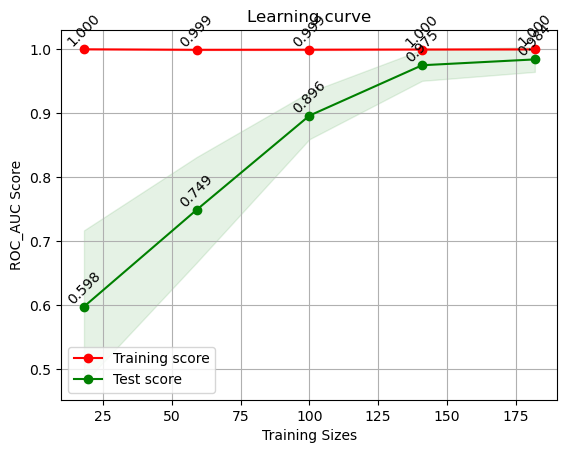

In [270]:
plot_learning_curve(lr, "Learning curve", X_train, y_train, X_test, y_test, cv=5,n_jobs=-1)
plt.show()

##### Decision Tree

In [258]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.912
Precision (Test Set): 0.765
Recall (Test Set): 0.929
F1-Score (Test Set): 0.839
roc_auc (test-proba): 0.918
roc_auc (train-proba): 1.000
roc_auc (crossval train): 1.000
roc_auc (crossval test): 0.881


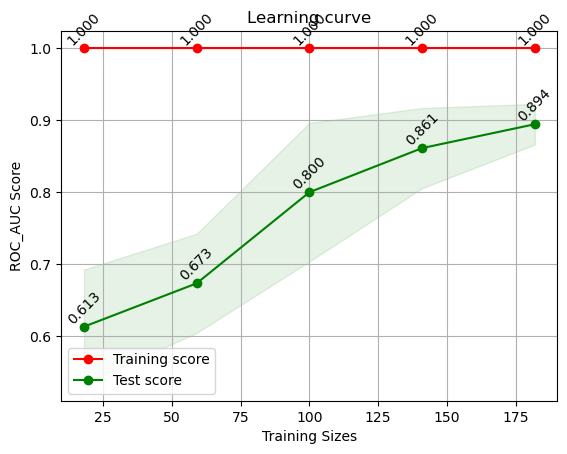

In [271]:
plot_learning_curve(dt, "Learning curve", X_train, y_train, X_test, y_test, cv=5,n_jobs=-1)
plt.show()

##### k-Nearest Neighbors

In [261]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy (Test Set): 0.737
Precision (Test Set): 0.000
Recall (Test Set): 0.000
F1-Score (Test Set): 0.000
roc_auc (test-proba): 0.557
roc_auc (train-proba): 0.923
roc_auc (crossval train): 0.916
roc_auc (crossval test): 0.714


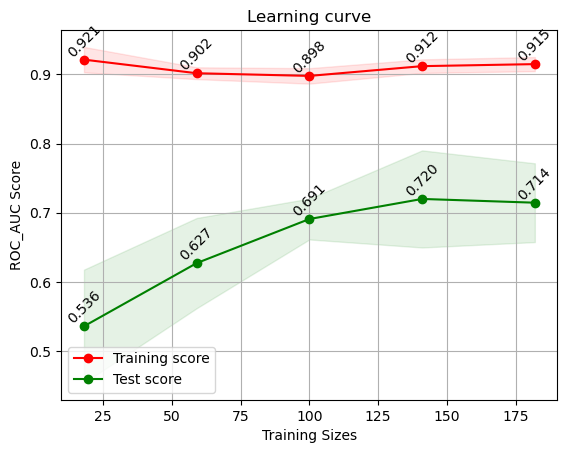

In [272]:
plot_learning_curve(knn, "Learning curve", X_train, y_train, X_test, y_test, cv=5,n_jobs=-1)
plt.show()

##### Random Forest

In [259]:
rf = RandomForestClassifier(max_depth=4, random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.912
Precision (Test Set): 1.000
Recall (Test Set): 0.643
F1-Score (Test Set): 0.783
roc_auc (test-proba): 0.970
roc_auc (train-proba): 0.995
roc_auc (crossval train): 0.998
roc_auc (crossval test): 0.970


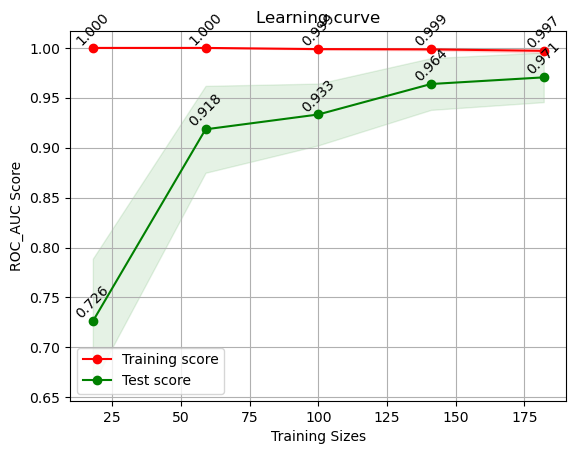

In [273]:
plot_learning_curve(rf, "Learning curve", X_train, y_train, X_test, y_test, cv=5,n_jobs=-1)
plt.show()

##### Extreme Gradient Boosting (XGBoost)

In [262]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
eval_classification(xgb)

Accuracy (Test Set): 0.877
Precision (Test Set): 0.733
Recall (Test Set): 0.786
F1-Score (Test Set): 0.759
roc_auc (test-proba): 0.920
roc_auc (train-proba): 1.000
roc_auc (crossval train): 1.000
roc_auc (crossval test): 0.894


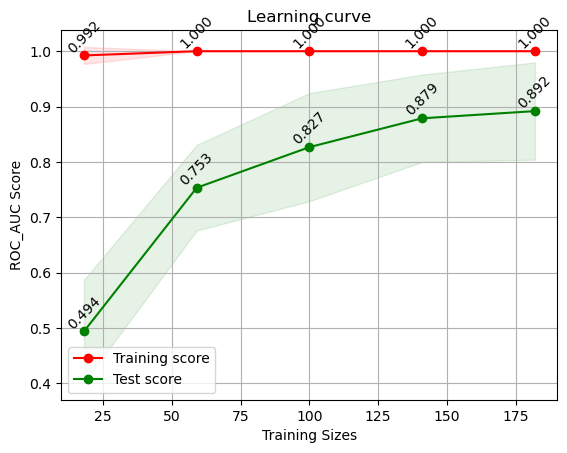

In [274]:
plot_learning_curve(xgb, "Learning curve", X_train, y_train, X_test, y_test, cv=5,n_jobs=-1)
plt.show()